# Natural Language Processing  - NLP


In [1]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# I can download the Coriolanus Tragedy play by William Shakespeare from cloud storage in GCP.
file_path = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1115394/1115394 [==============================] - 0s 0us/step


In [3]:
# The mode 'rb' indicates that the file will be opened in binary mode for reading.
text = open(file_path, 'rb').read().decode(encoding='utf-8')

In [4]:
# print 200 first character
print(text[:200])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you


In [5]:
text_char = sorted(set(text))
#create dictionary with all caracters
text_char_index = dict((char, index) for index, char in enumerate(text_char))
print(text_char_index)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}


## In this step, I iterate through each character in the text. For each character, I replace it with the corresponding character from an indexed dictionary created in the previous cell.

In [6]:
# Encode the text using the character dictionary
encoded_text = np.array([text_char_index[char] for char in text])
text_shap = encoded_text.shape
print(f'text shape: {text_shap}')

# Print the encoded text
print(encoded_text[:200])


text shape: (1115394,)
[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59  1 39 56 43  1 39 50 50  1 56 43 57 53 50 60 43 42  1 56 39
 58 46 43 56  1 58 53  1 42 47 43  1 58 46 39 52  1 58 53  1 44 39 51 47
 57 46 12  0  0 13 50 50 10  0 30 43 57 53 50 60 43 42  8  1 56 43 57 53
 50 60 43 42  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 18 47
 56 57 58  6  1 63 53 59]


In [7]:
# original text
text[:200]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you'

In [8]:
# This line of code creates a TensorFlow Datase
dataset_tf = tf.data.Dataset.from_tensor_slices(encoded_text)
type(dataset_tf)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [9]:
# prompt: mostrar todos os metodos do dataset_tf

for method_name in dir(dataset_tf):
  print(method_name)


_GeneratorState
__abstractmethods__
__bool__
__class__
__class_getitem__
__debug_string__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__iter__
__le__
__len__
__lt__
__module__
__ne__
__new__
__nonzero__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__slots__
__str__
__subclasshook__
__tf_tracing_type__
__weakref__
_abc_impl
_add_trackable_child
_add_variable_with_custom_getter
_apply_debug_options
_as_serialized_graph
_checkpoint_dependencies
_common_args
_consumers
_convert_variables_to_tensors
_copy_trackable_to_cpu
_deferred_dependencies
_deserialization_dependencies
_deserialize_from_proto
_export_to_saved_model_graph
_flat_shapes
_flat_structure
_flat_types
_functions
_gather_saveables_for_checkpoint
_graph
_graph_attr
_handle_deferred_dependencies
_inputs
_lookup_dependency
_maybe_initialize_trackable
_maybe_track_assets
_metadata
_name
_name_based_attribute_restore
_name_based_restores
_no_d

In [10]:
#combines consecutive elements of this dataset into batches
sequences = dataset_tf.batch(121, drop_remainder=True)

. This technique is particularly useful for tasks that involve predicting a sequence of words based on another sequence of words. The sequence move forward to one character
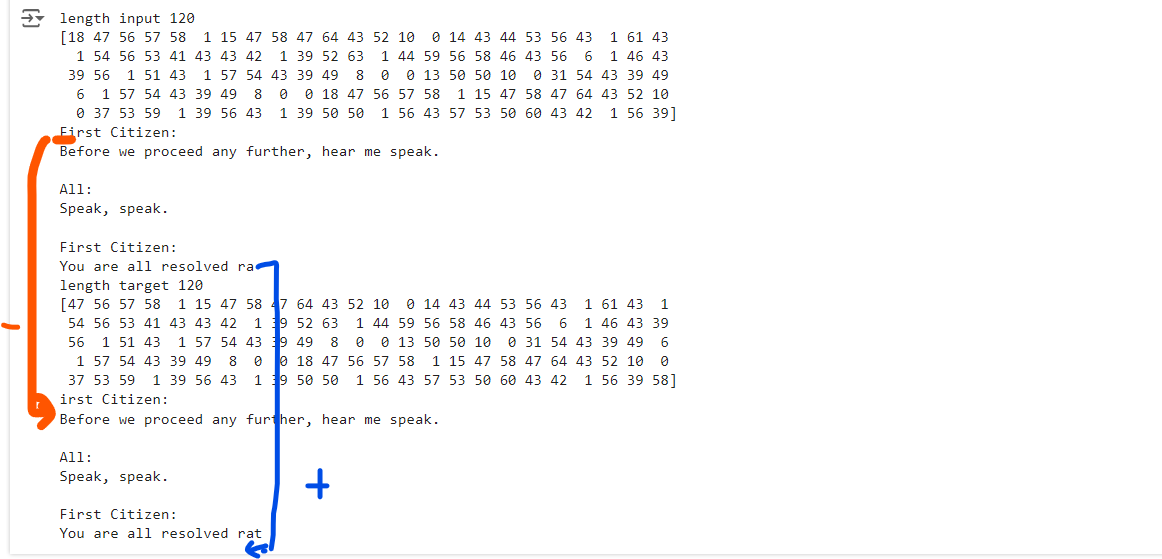

In [11]:
def create_sequences_targets_window(window):
    input_txt = window[:-1]
    target_txt = window[1:]
    return input_txt, target_txt

dataset = sequences.map(create_sequences_targets_window)

In [12]:
#print("dataset shape : {}".format(dataset.shape()))
for input_txt, target_txt in dataset.take(1):
    print("length input {}".format(len(input_txt)))
    print(input_txt.numpy())
    convert = "".join(text_char[i] for i in input_txt.numpy())
    print(convert)
    print("length target {}".format(len(target_txt)))
    print(target_txt.numpy())
    convert = "".join(text_char[i] for i in target_txt.numpy())
    print(convert)

length input 120
[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59  1 39 56 43  1 39 50 50  1 56 43 57 53 50 60 43 42  1 56 39]
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved ra
length target 120
[47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43  1
 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43 39
 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49  6
  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10  0
 37 53 59  1 39 56 43  1 39 50 50  1 56 43 57 53 50 60 43 42  1 56 39 58]
irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all reso

# Shuffle dataset

Shuffling the training data before each epoch is crucial in NLP to prevent the model from memorizing the data and to enhance generalization. By randomizing the sequence of data points, each epoch exposes the model to different patterns, improving its ability to learn underlying representations

In [13]:
'''
batch size = size for each mini-batch
drop remainder - means that if set true, this parameter ensures that any remaining
elements* are dropped
(*if the total number of elements is not divisible by the batch size) '''
dataset = dataset.shuffle(buffer_size=10000).batch(batch_size=128, drop_remainder=True)


shapes 128 refers batch size and 120 sequence of characters long

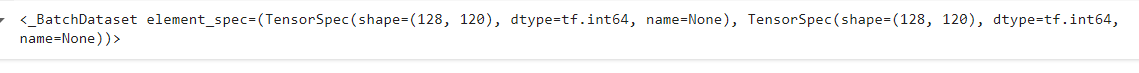

In [14]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(128, 120), dtype=tf.int64, name=None), TensorSpec(shape=(128, 120), dtype=tf.int64, name=None))>

Dimension embedding 256. And number  of neurons is 1024
# layers
## First layers
  - Map words

## second layer - GRU

A Gated Recurrent Unit (GRU) is a type of artificial neural network layer that is specifically designed to handle sequential data, such as text, speech, or time series data. GRU layers are a type of recurrent neural network (RNN), which are networks that can learn dependencies between elements in a sequence.
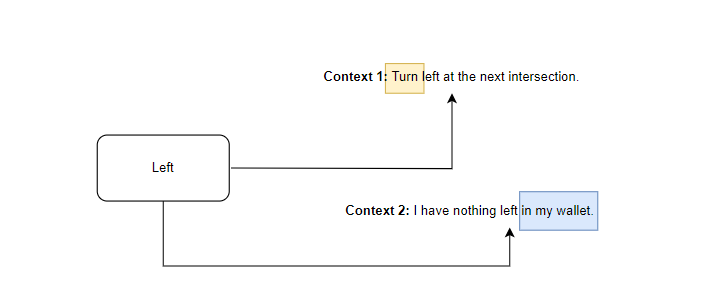

# Glorot uniform
referring to how weights are initialized:
Glorot uniform initialization draws random values for the weights from a uniform distribution within a specific range. The range is determined based on the fan-in and fan-out of the weight matrix.

Fan-in: The number of connections coming into a neuron or layer.
Fan-out: The number of connections going out from a neuron or layer.
The formula for the range of the uniform distribution is:

limit = sqrt(6 / (fan_in + fan_out))

In [15]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense

vocab_size = len(text_char)
embedding_dim = 64
rnn_units = 1026
batch_size=128

# two way to create layers
# first way
# model = tf.keras.Sequential([
#    tf.keras.layers.Embedding(vocab_size, embedding_dim),
#    tf.keras.layers.LSTM(rnn_units,
#                          return_sequences=True,
#                          stateful=True,
#                          recurrent_initializer='glorot_uniform'),
#    tf.keras.layers.Dense(vocab_size)
#])
#
model = tf.keras.Sequential()
model.add(Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]))
model.add(GRU(rnn_units,
              return_sequences=True,
              stateful=True,
              recurrent_initializer='glorot_uniform'))
model.add(tf.keras.layers.Dense(vocab_size))
summary = model.summary()
print(summary)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (128, None, 64)           4160      
                                                                 
 gru (GRU)                   (128, None, 1026)         3361176   
                                                                 
 dense (Dense)               (128, None, 65)           66755     
                                                                 
Total params: 3432091 (13.09 MB)
Trainable params: 3432091 (13.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
# create callback for change de parameter from_logits, because the default is false
def sparse_categorical_crossentropy_with_logits(y_true, y_pred):
  return sparse_categorical_crossentropy(y_true,y_pred, from_logits=True)
model.compile(optimizer=Adam(learning_rate=0.001), loss=sparse_categorical_crossentropy_with_logits)


In [17]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(128, 120, 65) # (batch_size, sequence_length, vocab_size)


In [23]:
# all the probabilities in second prediction
example_batch_predictions[1]

<tf.Tensor: shape=(120, 65), dtype=float32, numpy=
array([[-0.00286526,  0.00482637,  0.00334095, ...,  0.00193148,
        -0.00051206,  0.00704989],
       [ 0.00050888,  0.00943156,  0.00108209, ..., -0.00304685,
        -0.00420586, -0.00352121],
       [ 0.00238268,  0.00472726,  0.00058329, ..., -0.00104468,
        -0.00983431, -0.00530327],
       ...,
       [-0.0075376 ,  0.00842076,  0.00131395, ..., -0.00015393,
        -0.00099854, -0.00035444],
       [-0.00435139, -0.00117312, -0.00164317, ..., -0.0031745 ,
        -0.0024741 ,  0.00174661],
       [-0.00062959, -0.00230477, -0.00060364, ...,  0.00124461,
        -0.00704441, -0.00368282]], dtype=float32)>

In [27]:
# sample of indice of characters
results = tf.random.categorical(example_batch_predictions[0], num_samples=1)

In [28]:
results

<tf.Tensor: shape=(120, 1), dtype=int64, numpy=
array([[64],
       [23],
       [ 3],
       [64],
       [19],
       [12],
       [21],
       [45],
       [40],
       [34],
       [44],
       [ 4],
       [41],
       [52],
       [43],
       [25],
       [45],
       [38],
       [53],
       [45],
       [57],
       [25],
       [28],
       [60],
       [62],
       [59],
       [ 7],
       [54],
       [23],
       [45],
       [10],
       [19],
       [21],
       [21],
       [43],
       [63],
       [54],
       [10],
       [61],
       [60],
       [38],
       [ 4],
       [64],
       [45],
       [ 4],
       [24],
       [44],
       [17],
       [22],
       [25],
       [30],
       [40],
       [51],
       [41],
       [21],
       [33],
       [37],
       [ 2],
       [11],
       [53],
       [43],
       [63],
       [13],
       [49],
       [ 2],
       [ 8],
       [41],
       [27],
       [23],
       [ 3],
       [63],
       [53],
       [28],
   

In [30]:
# removes dimensions of size 1 from the shape of a tensor
results = tf.squeeze(results, axis=1).numpy()
results

array([64, 23,  3, 64, 19, 12, 21, 45, 40, 34, 44,  4, 41, 52, 43, 25, 45,
       38, 53, 45, 57, 25, 28, 60, 62, 59,  7, 54, 23, 45, 10, 19, 21, 21,
       43, 63, 54, 10, 61, 60, 38,  4, 64, 45,  4, 24, 44, 17, 22, 25, 30,
       40, 51, 41, 21, 33, 37,  2, 11, 53, 43, 63, 13, 49,  2,  8, 41, 27,
       23,  3, 63, 53, 28, 59, 38, 37,  8, 26, 25,  1, 17, 40,  2, 60, 55,
       53, 59, 16, 46, 38, 44, 28, 11, 45, 31,  7, 32,  5, 40, 35, 35, 63,
       53, 63, 21,  4,  1, 42, 53,  5, 52,  6, 45, 59, 60, 22, 45,  3, 54,
       44])

In [37]:
np.array(text_char)[results]

array(['z', 'K', '$', 'z', 'G', '?', 'I', 'g', 'b', 'V', 'f', '&', 'c',
       'n', 'e', 'M', 'g', 'Z', 'o', 'g', 's', 'M', 'P', 'v', 'x', 'u',
       '-', 'p', 'K', 'g', ':', 'G', 'I', 'I', 'e', 'y', 'p', ':', 'w',
       'v', 'Z', '&', 'z', 'g', '&', 'L', 'f', 'E', 'J', 'M', 'R', 'b',
       'm', 'c', 'I', 'U', 'Y', '!', ';', 'o', 'e', 'y', 'A', 'k', '!',
       '.', 'c', 'O', 'K', '$', 'y', 'o', 'P', 'u', 'Z', 'Y', '.', 'N',
       'M', ' ', 'E', 'b', '!', 'v', 'q', 'o', 'u', 'D', 'h', 'Z', 'f',
       'P', ';', 'g', 'S', '-', 'T', "'", 'b', 'W', 'W', 'y', 'o', 'y',
       'I', '&', ' ', 'd', 'o', "'", 'n', ',', 'g', 'u', 'v', 'J', 'g',
       '$', 'p', 'f'], dtype='<U1')

In [ ]:
model.fit(dataset, epochs=30)

Epoch 1/30
31/72 [===========>..................] - ETA: 5:13 - loss: 3.9622

In [ ]:
from tensorflow.keras.models import load_model
model.save('my_model.h5')